In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('attachment_default.csv')

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
df.shape

(10000, 4)

In [6]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


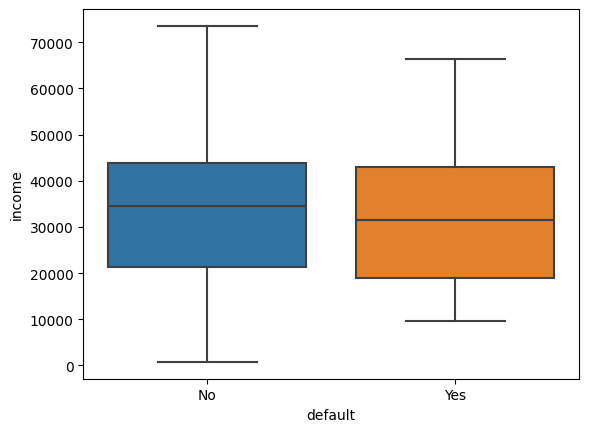

In [7]:
sns.boxplot(x='default', y='income', data=df)
plt.show()

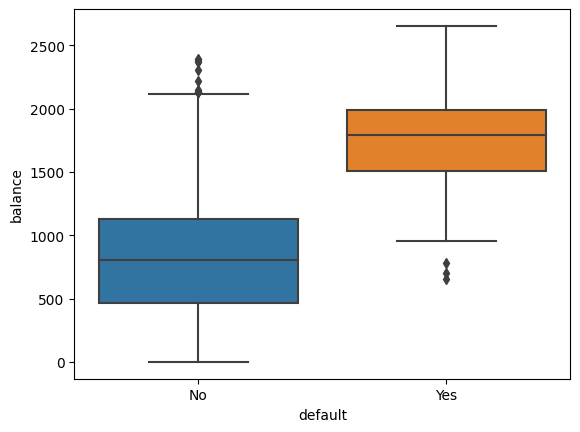

In [8]:
sns.boxplot(x='default', y='balance', data=df)
plt.show()

In [9]:
df['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [10]:
df['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


## Bivariate Analysis

In [12]:
pd.crosstab(df['default'], df['student'], rownames=['Default'], colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


<Axes: >

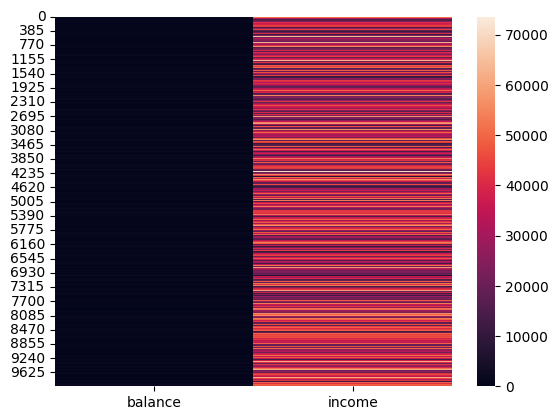

In [16]:
sns.heatmap(df[['balance','income']])

<Axes: >

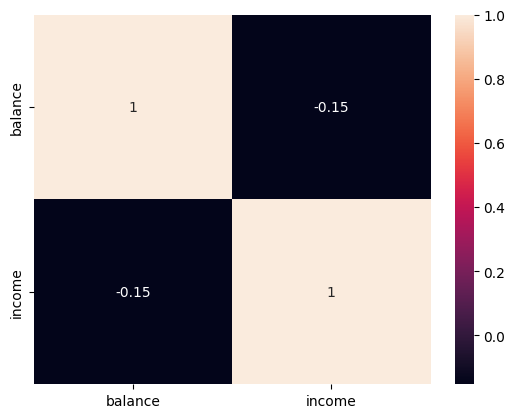

In [17]:
sns.heatmap(df[['balance','income']].corr(),annot=True)

In [18]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [19]:
Q1,Q3 = df['balance'].quantile([.25,.75])
IQR = Q3-Q1
LL = Q1 - 1.5 *(IQR)
UL = Q3 + 1.5 * (IQR)

In [21]:
IQR

684.5772814213195

In [22]:
UL

2193.174308607817

In [24]:
df1=df[df['balance']>UL]

In [25]:
df1

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [31]:
df1['default'].count()

31

In [30]:
df1['default'].value_counts()

default
Yes    26
No      5
Name: count, dtype: int64

In [32]:
df['balance'] = np.where(df['balance']>UL,UL,df['balance'])

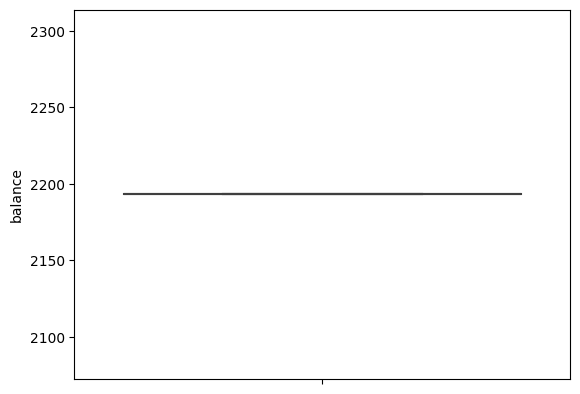

In [35]:
sns.boxplot(y=df['balance'])
plt.show()

In [38]:
df=pd.get_dummies(df,drop_first = True)

In [39]:
df.head()

,balance,income,default_Yes,student_Yes
173,2193.174309,14271.492253,True,True
1136,2193.174309,51504.293960,True,False
1160,2193.174309,14947.519752,True,True
1359,2193.174309,40725.096207,True,False
1502,2193.174309,11770.234124,True,True


In [ ]:
df.columns = ['balance','income','default','student']

In [59]:
df.head()

,balance,income,default_Yes,student_Yes
173,2193.174309,14271.492253,True,True
1136,2193.174309,51504.293960,True,False
1160,2193.174309,14947.519752,True,True
1359,2193.174309,40725.096207,True,False
1502,2193.174309,11770.234124,True,True


In [42]:
import sklearn

In [43]:
from sklearn.model_selection import train_test_split

In [53]:
x=df.drop(columns=['default_Yes'])

In [56]:
y=df['default_Yes']

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 21,stratify=y)

In [61]:
print(x_train.shape)
print(x_test.shape)

(21, 3)
(10, 3)


In [62]:
print(y_train.value_counts(normalize=True).round(2))

print(y_test.value_counts(normalize=True).round(2))

default_Yes
True     0.86
False    0.14
Name: proportion, dtype: float64
default_Yes
True     0.8
False    0.2
Name: proportion, dtype: float64


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr=LogisticRegression()

In [67]:
lr.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred=lr.predict(x_test)

In [81]:
from sklearn import metrics

In [84]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

In [85]:
confusion_matrix

array([[0, 2],
       [0, 8]], dtype=int64)

In [ ]:
(0+8)/(0+2+